In [1]:
# O objetivo deste programa é identificar se a renda da pessoa é <= 50k ou > 50k (renda anual)
# Foi realizado um tratamento de dados e depois foi realizado um modelo de rede neural e um modelo de regressão logística
# autor Christiano 
import pandas as pd

In [2]:
# importação dos dados
dataset = pd.read_csv('census.csv',sep = ',')

In [3]:
# visualização dos dados
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# verificação se não há dados faltantes NAN (Not Avalible)
dataset.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [5]:
# informações sobre as variáveis (colunas) - O tipo e se há dados faltantes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# dimensão da base de dados
dataset.shape

(32561, 15)

In [7]:
# Separação da variáveis preditoras ou regressoras da variável resposta
X = dataset.iloc[:,0:14].values
y = dataset.iloc[:,14].values

In [8]:
# Verificação dos datafreme obtidos no passo anterior
X.shape, y.shape

((32561, 14), (32561,))

In [9]:
# Preprocessamento - transformar dados categóricos em dados numéricos
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [10]:
# Verificação da primeira linha
X[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [11]:
# transformação dos dados categóricos em numéricos
X[:,1] = labelencoder.fit_transform(X[:,1])
X[:,3] = labelencoder.fit_transform(X[:,3])
X[:,5] = labelencoder.fit_transform(X[:,5])
X[:,6] = labelencoder.fit_transform(X[:,6])
X[:,7] = labelencoder.fit_transform(X[:,7])
X[:,8] = labelencoder.fit_transform(X[:,8])
X[:,9] = labelencoder.fit_transform(X[:,9])
X[:,13] = labelencoder.fit_transform(X[:,13])

In [12]:
# Verificação dos dados preditores após a transformação
X

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [13]:
# Padronização dos dados preditores
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()

In [14]:
X = scaler_x.fit_transform(X)

In [15]:
X

array([[ 0.03067056,  2.15057856, -1.06361075, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [ 0.83710898,  1.46373585, -1.008707  , ..., -0.21665953,
        -2.22215312,  0.29156857],
       [-0.04264203,  0.09005041,  0.2450785 , ..., -0.21665953,
        -0.03542945,  0.29156857],
       ...,
       [ 1.42360965,  0.09005041, -0.35877741, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [-1.21564337,  0.09005041,  0.11095988, ..., -0.21665953,
        -1.65522476,  0.29156857],
       [ 0.98373415,  0.77689313,  0.92989258, ..., -0.21665953,
        -0.03542945,  0.29156857]])

In [16]:
# Parte de pré - processamento. 
# Separação da base de dados em base de treino e base de teste
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 1)

In [18]:
# 70% dos dados para treino
len(X_train), len(y_train)

(22792, 22792)

In [19]:
# Verificação
print(len(X_train)/len(X))

0.6999785018887626


In [20]:
# 30% dos dados para teste
len(X_test), len(y_test)

(9769, 9769)

In [21]:
# Verificação
print(len(X_test)/len(X))

0.30002149811123735


In [22]:
# Verificação dos dados preditores após as transformações
X

array([[ 0.03067056,  2.15057856, -1.06361075, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [ 0.83710898,  1.46373585, -1.008707  , ..., -0.21665953,
        -2.22215312,  0.29156857],
       [-0.04264203,  0.09005041,  0.2450785 , ..., -0.21665953,
        -0.03542945,  0.29156857],
       ...,
       [ 1.42360965,  0.09005041, -0.35877741, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [-1.21564337,  0.09005041,  0.11095988, ..., -0.21665953,
        -1.65522476,  0.29156857],
       [ 0.98373415,  0.77689313,  0.92989258, ..., -0.21665953,
        -0.03542945,  0.29156857]])

In [23]:
# rede neural com 2 camadas ocultas com 20 e 100 neurônios.
from sklearn.neural_network import MLPClassifier

In [24]:
rede_neural_renda = MLPClassifier(max_iter = 1000,verbose = True,tol = 0.0000100,hidden_layer_sizes = (20,100),activation = 'relu')
rede_neural_renda.fit(X_train,y_train)

Iteration 1, loss = 0.47136534
Iteration 2, loss = 0.37533704
Iteration 3, loss = 0.35180931
Iteration 4, loss = 0.34090052
Iteration 5, loss = 0.33571250
Iteration 6, loss = 0.33260779
Iteration 7, loss = 0.32975938
Iteration 8, loss = 0.32838239
Iteration 9, loss = 0.32630906
Iteration 10, loss = 0.32495541
Iteration 11, loss = 0.32377623
Iteration 12, loss = 0.32282344
Iteration 13, loss = 0.32147877
Iteration 14, loss = 0.32126121
Iteration 15, loss = 0.32083313
Iteration 16, loss = 0.31932177
Iteration 17, loss = 0.31845318
Iteration 18, loss = 0.31722932
Iteration 19, loss = 0.31659782
Iteration 20, loss = 0.31621980
Iteration 21, loss = 0.31615549
Iteration 22, loss = 0.31501741
Iteration 23, loss = 0.31447957
Iteration 24, loss = 0.31427786
Iteration 25, loss = 0.31366115
Iteration 26, loss = 0.31262169
Iteration 27, loss = 0.31256254
Iteration 28, loss = 0.31228482
Iteration 29, loss = 0.31136916
Iteration 30, loss = 0.31083922
Iteration 31, loss = 0.31094919
Iteration 32, los

Iteration 253, loss = 0.27062739
Iteration 254, loss = 0.27202520
Iteration 255, loss = 0.27131173
Iteration 256, loss = 0.27113085
Iteration 257, loss = 0.27036800
Iteration 258, loss = 0.27016214
Iteration 259, loss = 0.27066325
Iteration 260, loss = 0.27069948
Iteration 261, loss = 0.26985465
Iteration 262, loss = 0.26997266
Iteration 263, loss = 0.27044315
Iteration 264, loss = 0.26917452
Iteration 265, loss = 0.27021357
Iteration 266, loss = 0.27030029
Iteration 267, loss = 0.26986679
Iteration 268, loss = 0.27012992
Iteration 269, loss = 0.26949127
Iteration 270, loss = 0.27006543
Iteration 271, loss = 0.26864371
Iteration 272, loss = 0.26955707
Iteration 273, loss = 0.26964552
Iteration 274, loss = 0.26873645
Iteration 275, loss = 0.26861416
Iteration 276, loss = 0.26847850
Iteration 277, loss = 0.26902993
Iteration 278, loss = 0.26792056
Iteration 279, loss = 0.26816362
Iteration 280, loss = 0.26883486
Iteration 281, loss = 0.26812820
Iteration 282, loss = 0.26817536
Iteration 

Iteration 502, loss = 0.25248361
Iteration 503, loss = 0.25242547
Iteration 504, loss = 0.25251814
Iteration 505, loss = 0.25253866
Iteration 506, loss = 0.25177371
Iteration 507, loss = 0.25060871
Iteration 508, loss = 0.25152318
Iteration 509, loss = 0.25171947
Iteration 510, loss = 0.25087605
Iteration 511, loss = 0.25166265
Iteration 512, loss = 0.25143101
Iteration 513, loss = 0.25275669
Iteration 514, loss = 0.25243585
Iteration 515, loss = 0.25250469
Iteration 516, loss = 0.25172691
Iteration 517, loss = 0.25099453
Iteration 518, loss = 0.25113185
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(20, 100), max_iter=1000, tol=1e-05,
              verbose=True)

In [25]:
# previsões da rede neural
previsoes_1 = rede_neural_renda.predict(X_test)
previsoes_1

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [26]:
# valores observados para comparação das previsões
y_test

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [27]:
# medida de acurácia - taxa de acerto
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
taxa_acerto_neural = accuracy_score(y_test,previsoes_1)
taxa_acerto_neural

0.8453270549698024

In [28]:
# matrix de classificação (o modelo acertou 90% da categoria <= 50K e 65% da categoria > 50K )
print(classification_report(y_test,previsoes_1))

              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      7550
        >50K       0.68      0.60      0.64      2219

    accuracy                           0.85      9769
   macro avg       0.78      0.76      0.77      9769
weighted avg       0.84      0.85      0.84      9769



In [29]:
# para <= 50k acertou 6.773 e errou 777
# para > 50k acertou 1.452 e errou 767
print(confusion_matrix(y_test,previsoes_1))

[[6924  626]
 [ 885 1334]]


In [30]:
from yellowbrick.classifier import ConfusionMatrix

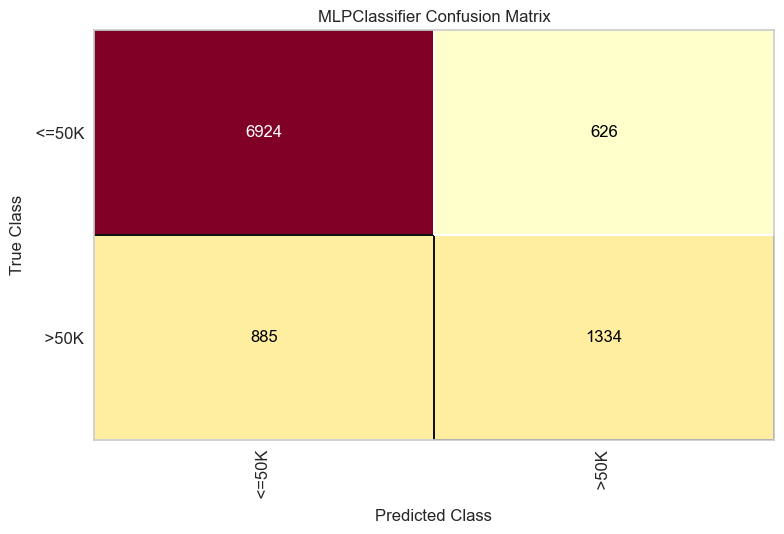

In [33]:
# matriz de confusão da rede neural (acertos: 6924 + 1334  e  erros: 626 + 885)
v = ConfusionMatrix(rede_neural_renda)
v.fit(X_train,y_train)
v.score(X_test,y_test)
v.poof();

In [34]:
# modelo de regressão logística
from sklearn.linear_model import LogisticRegression
classificador = LogisticRegression(max_iter = 12000)
classificador.fit(X_train,y_train)

LogisticRegression(max_iter=12000)

In [35]:
# previsões do modelo de regressão logística
previsoes_2 = classificador.predict(X_test)
previsoes_2

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [36]:
# valores observados
y_test

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [37]:
# taxa de acerto
taxa_acerto_logistica = accuracy_score(y_test,previsoes_2)
taxa_acerto_logistica

0.8306889139113522

In [38]:
# para <= 50k acertou 7.110 e errou 440
# para > 50k acertou 1.005 e errou 1.214
confusao_2 = confusion_matrix(y_test,previsoes_2)
print(confusao_2)

[[7110  440]
 [1214 1005]]


In [39]:
print(classification_report(y_test,previsoes_2))

              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.90      7550
        >50K       0.70      0.45      0.55      2219

    accuracy                           0.83      9769
   macro avg       0.77      0.70      0.72      9769
weighted avg       0.82      0.83      0.82      9769



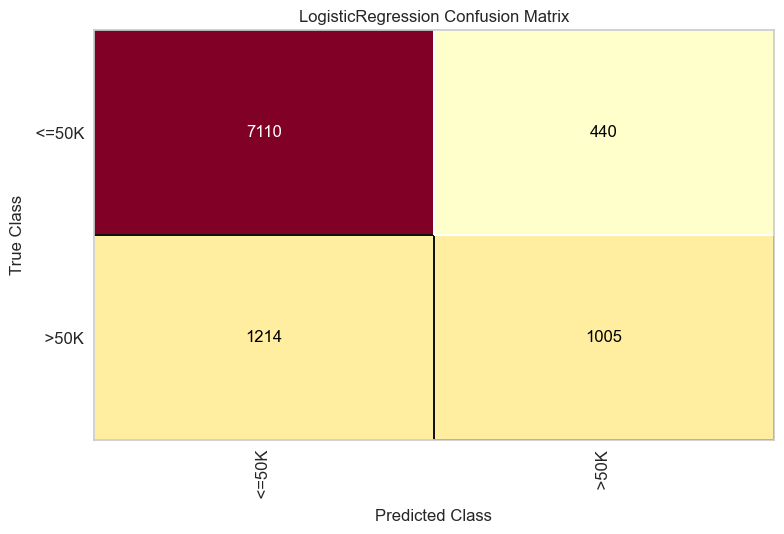

In [42]:
# matriz da confusão do modelo de regressão logística (acertos: 7110 + 1005 e erros: 440 + 1214)
v = ConfusionMatrix(classificador)
v.fit(X_train,y_train)
v.score(X_test,y_test)
v.poof();

In [40]:
# Verificação das previsões no modelo de regressão logística
print(classificador.predict([X[0],X[1]])) 
print(dataset.loc[0:1,'income'])

[' <=50K' ' <=50K']
0     <=50K
1     <=50K
Name: income, dtype: object


In [41]:
# Verificação das previsões no modelo de redes neurais
print(rede_neural_renda.predict([X[0],X[1]]))
print(dataset.loc[0:1,'income'])

[' <=50K' ' <=50K']
0     <=50K
1     <=50K
Name: income, dtype: object


# ambos os modelos tiveram desempelho semelhante tanto na parte dos acertos como também dos erros. Os modelos conseguiram ter maior precisão na classificação das pessoas com renda <= 50 k. O modelo de redes neurais obteve em geral um desempenho um pouco melhor em relação a regressão logística.